In [36]:
# Import basic libraries 
import numpy as np
import pandas as pd
# Import libraires for plotting 
import matplotlib.pyplot as plt
import seaborn as sns
# Import sklearn libraies
from sklearn import datasets
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import *


# Ignore wanrungs for simplicity 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data.csv")
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [4]:
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [5]:
# Extract train and test set from the dataset 
scaler = StandardScaler()
scaler.fit(X_train_unscaled)
X_train = scaler.transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [6]:
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [7]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [8]:
df.corr()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df[:4]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982


Text(0.5, 1.0, 'Correlation between different features')

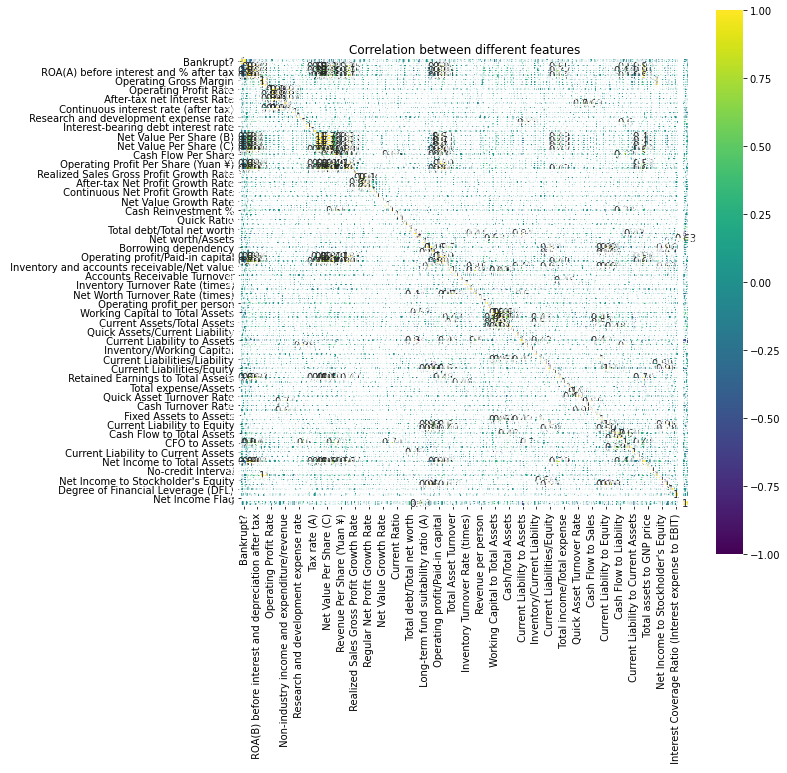

In [10]:
# Correlationship between dataset 
correlation = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different features')

In [11]:
# Extracting Eigen Vectors
def principal_component_analysis(data, n_components):
    pca = PCA(n_components=n_components).fit(data)
    eigen_vectors = pca.components_
    return eigen_vectors

In [12]:
# Calculating Principla Components from Eigen Vectors
def principal_component_calculation(data, component_weights):
    principal_components = np.matmul(data, component_weights.T)
    return principal_components

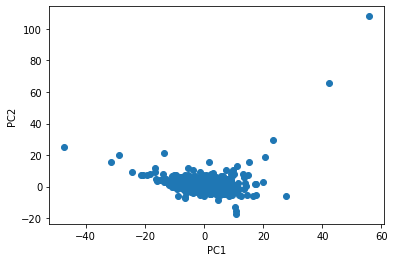

array([[-0.23572173, -0.237555  , -0.23383675, -0.11508048, -0.11466918,
        -0.01347584, -0.02071258, -0.0205037 , -0.00885833, -0.01985353,
        -0.00909698, -0.0267192 , -0.11749509, -0.01958391, -0.06284616,
        -0.19575484, -0.19580306, -0.19572239, -0.23522425, -0.13370468,
        -0.00816376, -0.21225345, -0.22788281,  0.00379415, -0.01327742,
        -0.03200451, -0.03190657, -0.00924747, -0.00613306,  0.01119058,
        -0.01840306, -0.1037976 , -0.00058578,  0.00808383,  0.00193166,
        -0.01162698,  0.13502548, -0.13502548, -0.01410918,  0.1276599 ,
         0.06444422, -0.21136486, -0.2291621 ,  0.0788441 , -0.04714634,
         0.00740206, -0.00109693,  0.0156638 ,  0.0366257 ,  0.009843  ,
         0.00744961, -0.09604695,  0.0019019 , -0.1359469 , -0.08749227,
        -0.05900587, -0.11547607,  0.00140254,  0.01775026,  0.10031969,
        -0.13738323, -0.00102779, -0.00688123, -0.03853224, -0.10500643,
         0.11468359, -0.0084536 , -0.17937318, -0.0

In [13]:
eigen_vectors = principal_component_analysis(X_train, 2)
principal_component_values = principal_component_calculation(X_train, eigen_vectors)
plt.scatter(principal_component_values[:, 0], principal_component_values[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
eigen_vectors

In [15]:
pca = PCA(n_components=30)
X_new = pca.fit_transform(X_train)
X_new

array([[ 2.44816482, -1.00059321, -0.26077231, ...,  1.12353273,
        -0.4051175 , -0.58267227],
       [ 0.80058703,  0.06768893, -0.22634304, ..., -0.32248501,
        -0.14225595, -0.18654965],
       [-0.99255022,  1.32427997, -1.96320506, ..., -0.14392263,
        -0.24899041, -0.07297276],
       ...,
       [-2.37112901, -0.14155806,  1.17860094, ..., -0.16903028,
         0.32971313,  0.29053673],
       [-1.77363105, -2.28620378,  1.00661525, ...,  0.52415505,
         0.16127748, -0.51820241],
       [-2.37749507,  0.38033481, -0.03948058, ..., -0.77314016,
         0.08363889, -0.23956848]])

In [16]:
pca.get_covariance()

array([[ 1.2010963 ,  0.86270046,  0.86042338, ...,  0.01173326,
         0.        ,  0.05612754],
       [ 0.86270046,  1.22242466,  0.86592165, ...,  0.00988457,
         0.        ,  0.06096775],
       [ 0.86042338,  0.86592165,  1.20279224, ...,  0.00513418,
         0.        ,  0.0590197 ],
       ...,
       [ 0.01173326,  0.00988457,  0.00513418, ...,  0.63341729,
         0.        , -0.04002863],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.34002375,  0.        ],
       [ 0.05612754,  0.06096775,  0.0590197 , ..., -0.04002863,
         0.        ,  0.9542412 ]])

In [17]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.13285184, 0.07574475, 0.05263836, 0.04676415, 0.04232574,
       0.03257589, 0.03089637, 0.02978366, 0.02835966, 0.02176027,
       0.02115934, 0.02005086, 0.01779722, 0.01639476, 0.01626511,
       0.0149669 , 0.01453162, 0.01423662, 0.01276126, 0.01222858,
       0.01189485, 0.01179533, 0.01158588, 0.01135553, 0.01122565,
       0.0109133 , 0.01071747, 0.01056928, 0.01044402, 0.01032603])

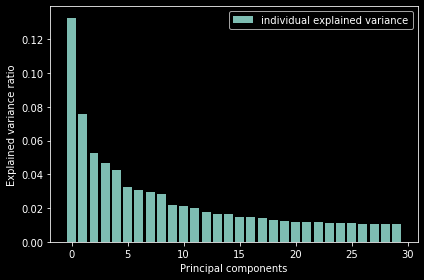

In [18]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(30), explained_variance, alpha=0.9, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()


<AxesSubplot:>

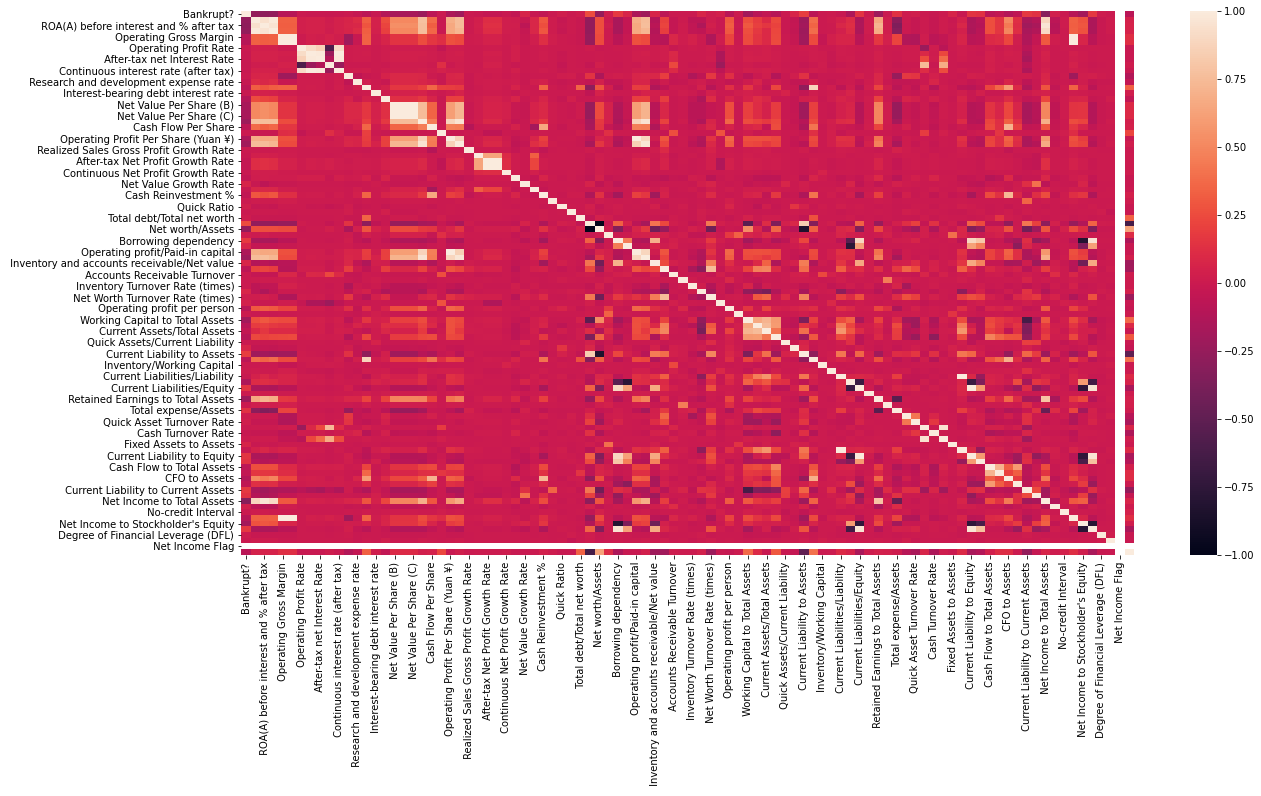

In [19]:
# Perform factor Analysis 
plt.figure(figsize=(20,10))
c = df.corr()
sns.heatmap(c)

In [20]:
def alda_regression_lasso(X_train, X_test, y_train, random_state=0):
    lrm = LassoCV(cv=10, random_state = random_state).fit(X_train, y_train)
    pred = lrm.predict(X_test)
    result = (lrm, pred)
    return result

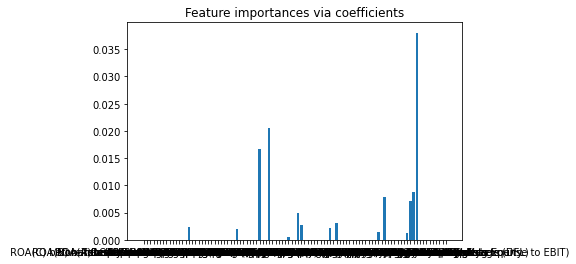

15
 Liability-Assets Flag
 Long-term fund suitability ratio (A)
 Total debt/Total net worth
 Current Liability to Current Assets
 Cash Flow to Sales
 Cash Flow to Equity
 Inventory Turnover Rate (times)
 Current Liability to Assets
 Fixed Assets Turnover Frequency
 Interest-bearing debt interest rate
 Quick Assets/Current Liability
 Total Asset Growth Rate
 Working capitcal Turnover Rate
 CFO to Assets
 Total Asset Turnover
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?
Bankrupt?


In [21]:

lasso_model, lasso_predictions = alda_regression_lasso(X_train, X_test, y_train)
importance = np.abs(lasso_model.coef_)
# Plotting importance of the features
plt.bar(height=importance, x=df.columns[:95])
plt.title("Feature importances via coefficients")
plt.show()


# Counting number of features with non-zero coefficients
count = 0
for i in range(len(importance)):
    if importance[i] > 0:
        count = count + 1
print(count)

# List of features from the highest importance to lowest among
# 31 features with non-zero importance 
coef_list = []
for i in range(len(importance)):
    bestAttributeIdx = np.argmax(importance)
    coef_list.append(bestAttributeIdx)
    importance[bestAttributeIdx] = 0
for i in coef_list[:31]:
    print(df.columns[i])
          






In [22]:
lr_mod = sm.OLS(y_train, X_train)
fii = lr_mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']
print(p_values)

x1       1.679132e-02
x2       4.173953e-11
x3       3.523169e-04
x4       9.550934e-01
x5       1.860372e-01
             ...     
x91      8.019698e-01
x92      4.658428e-01
x93      7.462547e-01
const             NaN
x94      6.384560e-01
Name: P>|t|, Length: 95, dtype: float64


In [23]:
reg = LinearRegression().fit(X_train, y_train)
model = SelectFromModel(reg, prefit=True)
reducedData = model.transform(X_train)
print(X.columns[model.get_support()])

Index([' Debt ratio %', ' Net worth/Assets'], dtype='object')


In [24]:
#Now trim the dataset to viable attributes which are:
# Debt ratio %
# Operating Funds to Liability
# Revenue Per Share (Yuan ¥)
# net worth/assets
# current liability to equity

newData = df
newData = newData[["Bankrupt?", " Debt ratio %", " Liability-Assets Flag", " Long-term fund suitability ratio (A)", " Net worth/Assets",  " Total debt/Total net worth"]]

In [25]:
#This is the preprocessing on the new data after dimensionality reduction

#Split into xy
X = newData.iloc[:,1:]
y = newData.iloc[:,0]

#train test split
X_train_unscaled, X_test_unscaled, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train_unscaled)
X_train = scaler.transform(X_train_unscaled)
X_test = scaler.transform(X_test_unscaled)

In [26]:
def evaluation_measures(y_true, y_pred):
    cMat = confusion_matrix(y_true, y_pred)
    correct = 0
    incorrect = 0
    for i in range(0, cMat.shape[0]):
        for j in range (0, cMat.shape[1]):
            if i == j:
                correct += cMat[i][j]
            if i != j:
                incorrect += cMat[i][j]
    accuracy = correct / (correct + incorrect)
    list = []
    list.append(accuracy)
    list.append(cMat)
    return list
    raise NotImplementedError()

In [39]:
def evaluation_measures2(y_true, y_pred):
    cMat = confusion_matrix(y_true, y_pred)
    vals = cMat.ravel() #TN FP FN TP
    precision = vals[3] / (vals[3] + vals[1]) 
    recall = vals[3] / (vals[3] + vals[2])
    f1 = (2*recall*precision) / (recall + precision)
    list = []
    list.append(precision)
    list.append(recall)
    list.append(f1)
    return list
    raise NotImplementedError()

In [103]:
cost_matrix = [[-1, 1],[25, -50]]
def calc_cost(conf_matrix, cost_matrix):
    cost = conf_matrix[0][0] * cost_matrix[0][0]
    cost = cost + (conf_matrix[0][1] * cost_matrix[0][1])
    cost = cost + (conf_matrix[1][0] * cost_matrix[1][0])
    cost = cost + (conf_matrix[1][1] * cost_matrix[1][1])
    return cost

In [104]:
### Train a linear regression model on the training set and see its performance
linRegModel = LinearRegression().fit(X_train, y_train)
linRegPredictions = linRegModel.predict(X_test)

classBound = 0.119

for i in range(0, len(linRegPredictions)):
    if linRegPredictions[i] <= classBound:
        linRegPredictions[i] = 0
    else:
        linRegPredictions[i] = 1

accuracy, cm = evaluation_measures(y_test, linRegPredictions)
precision, recall, f1 = evaluation_measures2(y_test, linRegPredictions)
linRegCost = calc_cost(cm, cost_matrix)
print("**For the linear Regression**")
print(f"The confusion matrix is:\n {cm}\nThe Accuracy is: {accuracy}\nThe Precision is: {precision}\nThe recall is: {recall}\nThe f1 is: {f1}")
print(f"The cost is: {linRegCost}")

**For the linear Regression**
The confusion matrix is:
 [[1965   22]
 [  45   14]]
The Accuracy is: 0.9672531769305963
The Precision is: 0.3888888888888889
The recall is: 0.23728813559322035
The f1 is: 0.2947368421052632
The cost is: -1518


## 

In [105]:
# KNN with default parameters
knnModel = KNeighborsClassifier()
knnModel.fit(X_train, y_train)
knnPredictions = knnModel.predict(X_test)
accuracy, cm = evaluation_measures(y_test, knnPredictions)
precision, recall, f1 = evaluation_measures2(y_test, knnPredictions)
knnCost = calc_cost(cm, cost_matrix)
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1: ", f1)
print("Cost: ", knnCost)
print(knnModel.get_params())

Confusion Matrix: 
 [[1977   10]
 [  53    6]]
Accuracy:  0.969208211143695
Precision:  0.375
Recall:  0.1016949152542373
f1:  0.16
Cost:  -942
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [106]:
# KNN with best parameters for recall
knnModel = KNeighborsClassifier(n_neighbors=1, leaf_size=1, p=2, weights='uniform', algorithm='ball_tree')
knnModel.fit(X_train, y_train)
knnPredictions = knnModel.predict(X_test)
accuracy, cm = evaluation_measures(y_test, knnPredictions)
precision, recall, f1 = evaluation_measures2(y_test, knnPredictions)
knnCost = calc_cost(cm, cost_matrix)
print("Confusion Matrix: \n", cm)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1: ", f1)
print("Cost: ", knnCost)
print(knnModel.get_params())

Confusion Matrix: 
 [[1944   43]
 [  47   12]]
Accuracy:  0.9560117302052786
Precision:  0.21818181818181817
Recall:  0.2033898305084746
f1:  0.2105263157894737
Cost:  -1326
{'algorithm': 'ball_tree', 'leaf_size': 1, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


In [107]:
## Train a random forest model on the training set and see its performance 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier as rfc 
from sklearn.metrics import *
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10, 12],
    'min_samples_leaf' : [8, 12, 18],
    'min_samples_split' : [8, 16, 20]
}
clf = rfc(random_state=0, n_jobs=-1)
cv_scores = cross_val_score(clf, X_train, y_train, cv = 3)
cv_scores.mean()

grid_cv = GridSearchCV(clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print("The most optimal parameters:\n", grid_cv.best_params_)
print("The best accuracy: {0:.4f}".format(grid_cv.best_score_))


The most optimal parameters:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
The best accuracy: 0.9665


In [108]:
clf = rfc(random_state=0, n_jobs=-1, n_estimators=300, max_depth=6, min_samples_leaf=8, min_samples_split=8)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

In [109]:
confusionList = evaluation_measures(y_test, pred)
print(f"confusionMatrix: \n{confusionList[1]}\naccracy: {confusionList[0]} \n ")
evaluationList = evaluation_measures2(y_test, pred)
print(f"PRECISION: {evaluationList[0]} \nRECALL: {evaluationList[1]}, \nfl_score: {evaluationList[2]}")

rfCost = calc_cost(confusionList[1], cost_matrix)
print(f"Cost:{rfCost}")

confusionMatrix: 
[[1986    1]
 [  56    3]]
accracy: 0.9721407624633431 
 
PRECISION: 0.75 
RECALL: 0.05084745762711865, 
fl_score: 0.09523809523809525
Cost:-735
